In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# To get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

# Display all rows and columns of a datafram instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [168]:
# loading data

data=pd.read_csv(r"C:\Users\97158\Desktop\Apziva\Project 1-Customer Happiness\Raw Data\ACME-HappinessSurvey2020.csv")



In [169]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [170]:
# Checking for null values

data.isnull().any()
print('Total null values present: ',data.isnull().any().sum())

Y     False
X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
dtype: bool

Total null values present:  0


Definition of the above labels

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers <br>
X1 = my order was delivered on time <br>
X2 = contents of my order was as I expected <br>
X3 = I ordered everything I wanted to order <br>
X4 = I paid a good price for my order <br>
X5 = I am satisfied with my courier <br>
X6 = the app makes ordering easy for me <br>


In [171]:
X=data.drop('Y',axis=1)
Y=data['Y']
X.shape
Y.shape

(126, 6)

(126,)

array([[<Axes: title={'center': 'Y'}>, <Axes: title={'center': 'X1'}>,
        <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>],
       [<Axes: title={'center': 'X6'}>, <Axes: >, <Axes: >]], dtype=object)

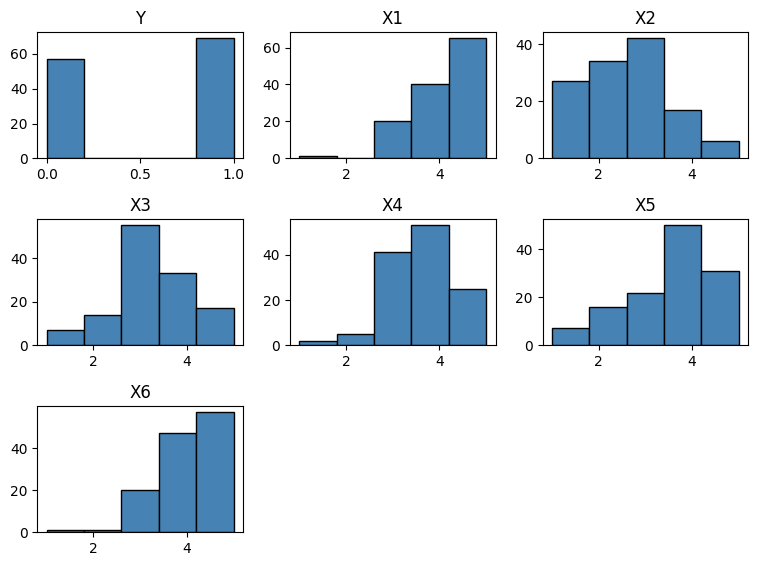

In [172]:
#visulaizing distribution

data.hist(bins=5, color='steelblue', edgecolor='black',  grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

From above, we can see customers are happy with X1,X4,X5, and X6 labels. On the other hand, customers had satisfactory view for labels X2 and X3 which pertain to content of food delivered and prefered order fulfillment by customer. 

<Axes: >

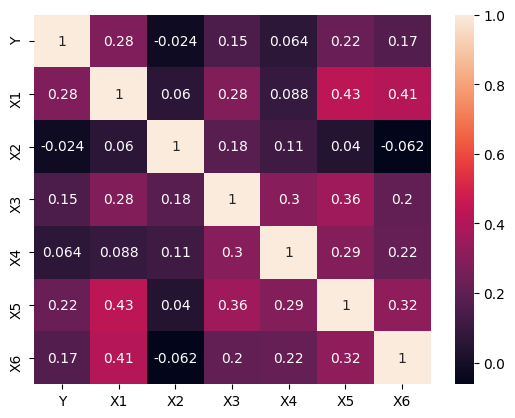

In [173]:
#Finding correlation between variables with respect to target variable Y

Cor_data=data.corr()
sns.heatmap(Cor_data, annot=True)

From above, we see that label X2 and X4 are poor predictors of target variable Y. Thus we will drop them from our analysis when running ML models

In [174]:
X=data.drop(['Y','X2','X4'],axis=1)
X.shape
Y.shape

(126, 4)

(126,)

# Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier

In [176]:
#Splitting data for training and testing
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=42, test_size=0.15)
LR=LogisticRegression()

In [177]:
X_train.shape
Y_train.shape

(107, 4)

(107,)

In [178]:
#Applying Logistic Regression

LR.fit(X_train,Y_train)
LR_y_pred= LR.predict(X_test)
pred_proba=LR.predict_proba(X_test)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.43      0.67      0.52         9

    accuracy                           0.42        19
   macro avg       0.41      0.43      0.39        19
weighted avg       0.41      0.42      0.39        19



<Axes: >

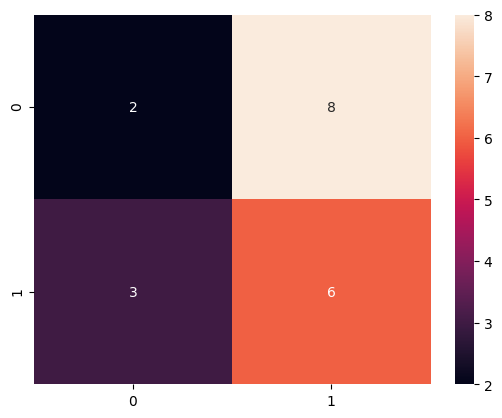

In [179]:
#Evaluating the base model

print(classification_report(Y_test, LR_y_pred))

cm0=confusion_matrix(Y_test,LR_y_pred)
sns.heatmap(cm0,annot=True)

In [180]:
dict_list=[]



LR_W0_GS=f1_score(Y_test,LR_y_pred)
row_dict={'Logistic Regression Score':round(LR_W0_GS*100,1)}
dict_list.append(row_dict)

Text(0.5, 1.0, 'Receiver Operating Curve')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

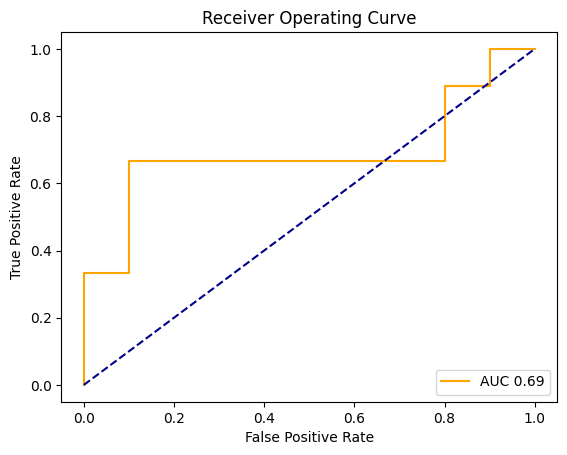

In [181]:
from sklearn import metrics

fpr,tpr,thresh=metrics.roc_curve(Y_test,pred_proba[:,1])
AUC_ROC=metrics.auc(fpr,tpr)


plt.plot(fpr,tpr, 'orange',label='AUC %.2f' % AUC_ROC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'darkblue',linestyle='--')

plt.title('Receiver Operating Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [182]:
# OPtimizing Logistic Regression via Gridsearch


# Defining the grid values of the hyperparameters

parameter_grid={'C':[0.1,1,10,20,30,40],'penalty':['l1','l2'],'solver':['liblinear','newton-cg','lbfgs'],
                'max_iter':[80,100,110,120,130]}


LR_GS=LogisticRegression()
grid=GridSearchCV(estimator=LR_GS,param_grid=parameter_grid,cv=3,n_jobs=-1)



In [183]:
grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
LR_GS_Y=grid.predict(X_test)
print('Grid_Search_F1_Score: ',f1_score(Y_test,LR_GS_Y))


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 30, 40],
                         'max_iter': [80, 100, 110, 120, 130],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']})

Best: 0.598942 using {'C': 1, 'max_iter': 80, 'penalty': 'l2', 'solver': 'newton-cg'}
Grid_Search_F1_Score:  0.5217391304347826


In [184]:
LR_W_GS=f1_score(Y_test,LR_GS_Y)
row_dict2={'Logistic Regression Score with Grid_Search':round(LR_W_GS*100,1)}
dict_list.append(row_dict2)

dict_list

[{'Logistic Regression Score': 52.2},
 {'Logistic Regression Score with Grid_Search': 52.2}]

List of hyper-parameters for different classification algorithims

max_depth and min_samples_split for decision trees.

n_neighbors and weights for K-Nearest Neighbours.

gamma and C for SVMs with RBF.

alpha for NaiveBayes.

# Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [186]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



<Axes: >

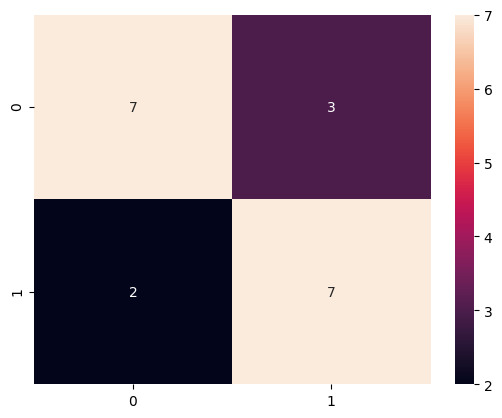

In [187]:
DT_y_pred=DT.predict(X_test)
print(classification_report(Y_test,DT_y_pred))

CM1=confusion_matrix(Y_test,DT_y_pred)
sns.heatmap(CM1,annot=True)

In [188]:
DT_F1=f1_score(Y_test,DT_y_pred)
row_dict3={'Decision Tree Model':round(DT_F1*100,1)}
dict_list.append(row_dict3)

DecisionTreeClassifier(max_depth=1)

DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=4)

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(max_depth=7)

DecisionTreeClassifier(max_depth=8)

DecisionTreeClassifier(max_depth=9)

DecisionTreeClassifier(max_depth=10)

DecisionTreeClassifier(max_depth=11)

DecisionTreeClassifier(max_depth=12)

DecisionTreeClassifier(max_depth=13)

DecisionTreeClassifier(max_depth=14)

DecisionTreeClassifier(max_depth=15)

DecisionTreeClassifier(max_depth=16)

DecisionTreeClassifier(max_depth=17)

DecisionTreeClassifier(max_depth=18)

DecisionTreeClassifier(max_depth=19)

DecisionTreeClassifier(max_depth=20)

Text(0.5, 0, 'Maximum Depth')

Text(0, 0.5, 'Total Error')

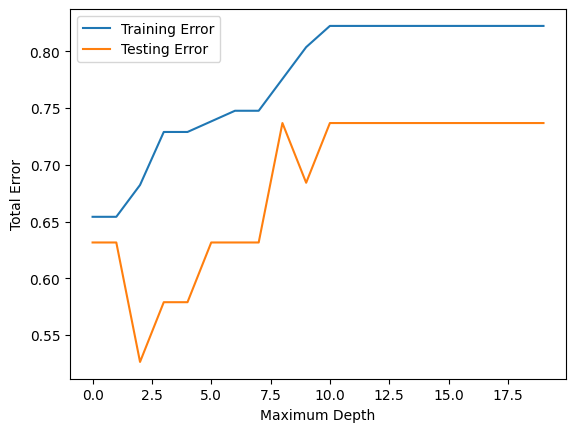

In [189]:
train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in range(1,21):
   dtc = DecisionTreeClassifier(max_depth=x) 
   dtc.fit(X_train,Y_train)
   train_y = dtc.predict(X_train)
   test_y = dtc.predict(X_test)
   train_errors.append(accuracy_score(Y_train, train_y))
   test_errors.append(accuracy_score(Y_test, test_y))
   
  

x = range(20) # Create domain for plot
plt.plot(x, train_errors, label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph


From above it is clear that with increased depth, the training score gets better but the testing score deteriorates thus making it clear that the model is overfitting due to non-convergence. 

To further optimize the Decision Tree algorithim, we will employ Random Forest algorithim that will take an ensemble of decision trees and optimize misclassified categories further. 

In [190]:
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)
RF_y_pred= RF.predict(X_test)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



<Axes: >

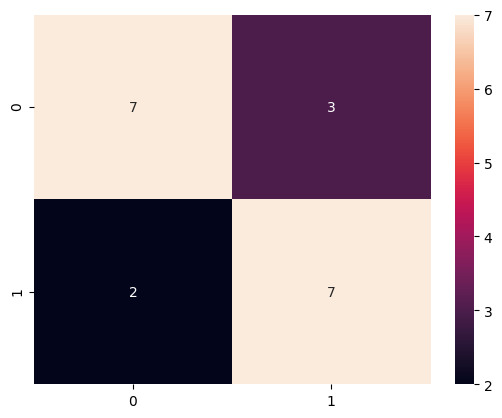

In [191]:
print(classification_report(Y_test,RF_y_pred))

CM2=confusion_matrix(Y_test,RF_y_pred)
sns.heatmap(CM2,annot=True)

In [192]:
RF_F1=f1_score(Y_test,RF_y_pred)
row_dict4={'Randomm Forest Tree Model':round(RF_F1*100,1)}
dict_list.append(row_dict4)

# KNN

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)
KNN_y_pred=KNN.predict(X_test)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



<Axes: >

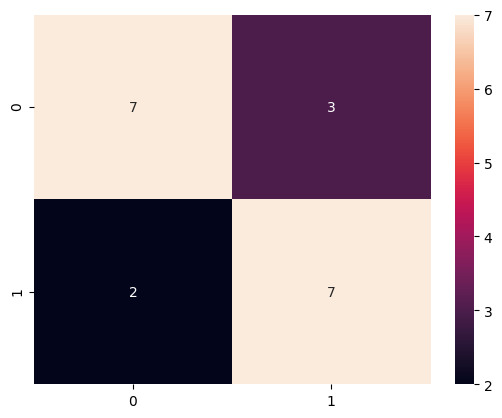

In [195]:
print(classification_report(Y_test,KNN_y_pred))

CM3=confusion_matrix(Y_test,KNN_y_pred)
sns.heatmap(CM3,annot=True)

In [196]:
KNN_f1=f1_score(Y_test,KNN_y_pred)
row_dict5={'KNN Model':round(KNN_f1*100,1)}
dict_list.append(row_dict5)

In [197]:
KNN2=KNeighborsClassifier()

KNN2_param_grid={'n_neighbors':[2,5,7,9,11,13],'weights':['uniform','distance']}
GS_KNN=GridSearchCV(KNN2,param_grid=KNN2_param_grid, cv=3)

GS_KNN.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [198]:
GS_KNN.best_params_

GS_KNN_y_pred=GS_KNN.predict(X_test)

{'n_neighbors': 9, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.67      0.89      0.76         9

    accuracy                           0.74        19
   macro avg       0.76      0.74      0.73        19
weighted avg       0.77      0.74      0.73        19



<Axes: >

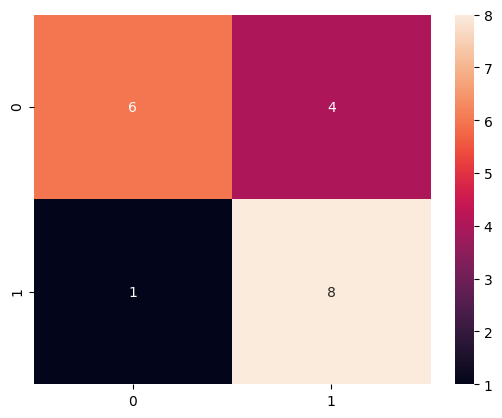

In [199]:
print(classification_report(Y_test,GS_KNN_y_pred))

CM3=confusion_matrix(Y_test,GS_KNN_y_pred)
sns.heatmap(CM3,annot=True)

In [200]:
KNN_f1_GS=f1_score(Y_test,GS_KNN_y_pred)
row_dict6={'KNN Model with Grid Search':round(KNN_f1_GS*100,1)}
dict_list.append(row_dict6)

# SVM

In [201]:
from sklearn.svm import SVC

In [202]:
SVM=SVC()
SVM.fit(X_train,Y_train)
SVM_y_pred=SVM.predict(X_test)

SVC()

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.53      0.89      0.67         9

    accuracy                           0.58        19
   macro avg       0.64      0.59      0.55        19
weighted avg       0.65      0.58      0.54        19



<Axes: >

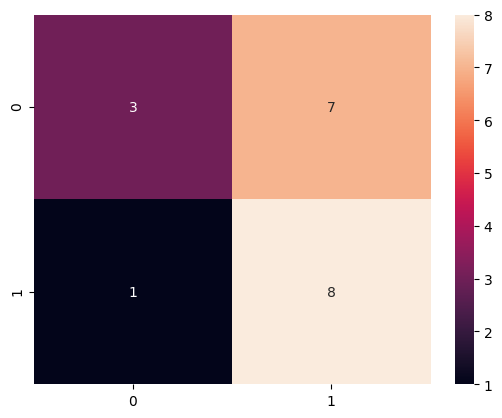

In [203]:
print(classification_report(Y_test,SVM_y_pred))

CM4=confusion_matrix(Y_test,SVM_y_pred)
sns.heatmap(CM4,annot=True)

In [204]:
SVM_f1=f1_score(Y_test,SVM_y_pred)
row_dict7={'SVM Model':round(SVM_f1*100,1)}
dict_list.append(row_dict7)

In [205]:
# Optimizing using Gridsearch


SVM_param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

SVM2=SVC()
SVM_grid=GridSearchCV(SVM2,param_grid=SVM_param_grid,refit=True,verbose=4)
SVM_grid.fit(X_train,Y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [206]:
SVM_grid.best_params_
SVM_grid.best_score_

SVM_grid_y_pred=SVM_grid.predict(X_test)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

0.6731601731601732

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.57      0.89      0.70         9

    accuracy                           0.63        19
   macro avg       0.69      0.64      0.61        19
weighted avg       0.69      0.63      0.61        19



<Axes: >

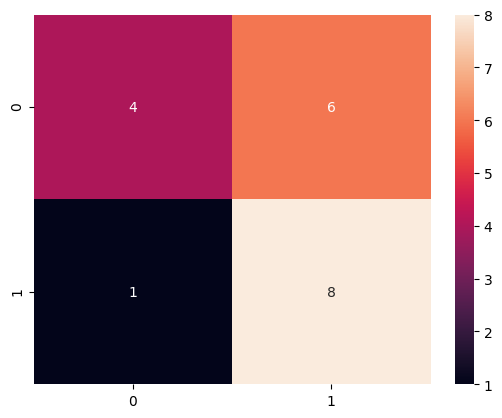

In [207]:
print(classification_report(Y_test,SVM_grid_y_pred))

CM5=confusion_matrix(Y_test,SVM_grid_y_pred)
sns.heatmap(CM5,annot=True)

In [208]:
SVM_f1_GS=f1_score(Y_test,SVM_grid_y_pred)
row_dict8={'SVM Model with Grid Search':round(SVM_f1_GS*100,1)}
dict_list.append(row_dict8)

# Naive Bayes

In [209]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [210]:
NB_multi=MultinomialNB()
NB_multi.fit(X_train,Y_train)
NB_multi_y_pred=SVM.predict(X_test)



NB_GAS=GaussianNB()
NB_GAS.fit(X_train,Y_train)
NB_GAS_y_pred=SVM.predict(X_test)

MultinomialNB()

GaussianNB()

Naive Bayes: Multinimial               precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.53      0.89      0.67         9

    accuracy                           0.58        19
   macro avg       0.64      0.59      0.55        19
weighted avg       0.65      0.58      0.54        19



<Axes: >

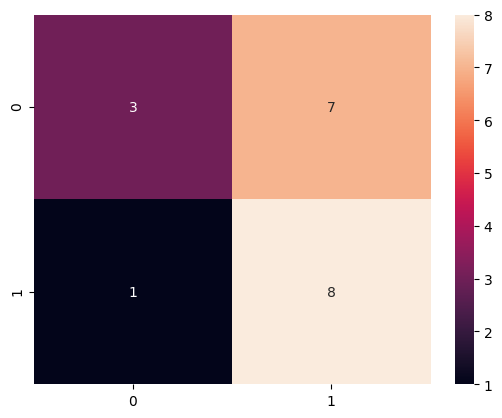

In [211]:
print('Naive Bayes: Multinimial',classification_report(Y_test,NB_multi_y_pred))


CM6=confusion_matrix(Y_test,NB_multi_y_pred)
sns.heatmap(CM6,annot=True)

In [212]:
NB_f1=f1_score(Y_test,NB_multi_y_pred)
row_dict9={'Naive Bayes with Multinomial':round(NB_f1*100,1)}
dict_list.append(row_dict9)

Naive Bayes: Gaussian               precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.53      0.89      0.67         9

    accuracy                           0.58        19
   macro avg       0.64      0.59      0.55        19
weighted avg       0.65      0.58      0.54        19



<Axes: >

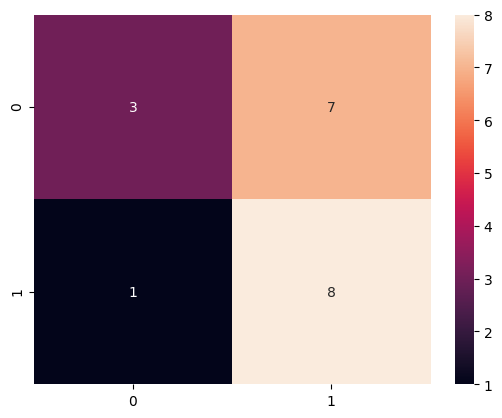

In [213]:
print('Naive Bayes: Gaussian',classification_report(Y_test,NB_GAS_y_pred))


CM6=confusion_matrix(Y_test,NB_GAS_y_pred)
sns.heatmap(CM6,annot=True)

In [214]:
#optimizing Alpha via GridSearch

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10]
NB_params={'alpha':alpha}

NB_multi2=MultinomialNB()
NB_GAS2=GaussianNB()

NB_multi2_GS=GridSearchCV(NB_multi2,param_grid=NB_params,cv=3)
NB_GAS2_GS=GridSearchCV(NB_multi2,param_grid=NB_params,cv=3)

In [215]:
NB_multi2_GS.fit(X_train,Y_train)
NB_GAS2_GS.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [216]:
NB_multi2_GS.best_params_
NB_GAS2_GS.best_params_

{'alpha': 1e-05}

{'alpha': 1e-05}

In [217]:
NB_multi2_GS_y_pred=NB_multi2_GS.predict(X_test)
NB_GAS2_GS_y_pred=NB_GAS2_GS.predict(X_test)

Naive Bayes: Multinomial
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.47      1.00      0.64         9

    accuracy                           0.47        19
   macro avg       0.24      0.50      0.32        19
weighted avg       0.22      0.47      0.30        19



<Axes: >

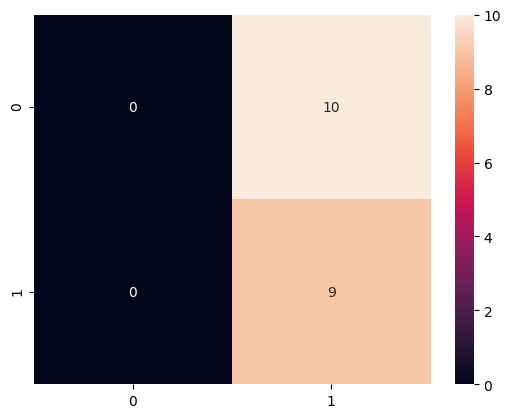

In [218]:
print('Naive Bayes: Multinomial' '\n',classification_report(Y_test,NB_multi2_GS_y_pred))


CM7=confusion_matrix(Y_test,NB_multi2_GS_y_pred)
sns.heatmap(CM7,annot=True)

In [219]:
NB_f1_GS=f1_score(Y_test,NB_multi2_GS_y_pred)
row_dict10={'Naive Bayes with Multinomial and GridSearch':round(NB_f1_GS*100,1)}
dict_list.append(row_dict10)

In [221]:
dict_list

[{'Logistic Regression Score': 52.2},
 {'Logistic Regression Score with Grid_Search': 52.2},
 {'Decision Tree Model': 73.7},
 {'Randomm Forest Tree Model': 73.7},
 {'KNN Model': 73.7},
 {'KNN Model with Grid Search': 76.2},
 {'SVM Model': 66.7},
 {'SVM Model with Grid Search': 69.6},
 {'Naive Bayes with Multinomial': 66.7},
 {'Naive Bayes with Multinomial and GridSearch': 64.3}]

From above we see that Grid search optimized KNN model yielded the highest results (76.2% - F1 Score) compared to other models. 2 key things to keep in mind would be Train/test split and feature engineering. 

Here Tain/test split was 85/15 (Due to small size of data)  <br>
Here feature engineering led to dropping of 2 features X2 and X4 for better variance explainability and results